In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import bz2
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [13]:
!bzcat bookings.csv.bz2 | head -10000 > bookings.sample.csv
!bzip2 -f bookings.sample.csv
!bzcat searches.csv.bz2 | head -10000 > searches.sample.csv
!bzip2 -f searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [181]:
booking_bz2 = 'bookings.sample.csv.bz2'
searches_bz2 = 'searches.sample.csv.bz2'
booking_big_bz2 = 'bookings.csv.bz2'
searches_big_bz2 = 'searches.csv.bz2'

### Exercise 1
Count the number of lines in Python for
each file

In [15]:
!bzcat bookings.sample.csv.bz2 | wc -l

10000


In [19]:
len(bz2.open(booking_bz2).readlines())

10000

### Exercise 2
Top 10 arrival airports in the world in 2013 (using the bookings file)  
• Arrival airport is the column arr_port. It is the IATA code for the airport
• To get the total number of passengers for an airport, you can sum the column
pax, grouping by arr_port. Note that there is negative pax. That corresponds to
cancelations. So to get the total number of passengers that have actually
booked, you should sum including the negatives (that will remove the canceled
bookings).  
• Print the top 10 arrival airports in the standard output, including the number of
passengers.  
• Bonus point: Get the name of the city or airport corresponding to that airport
(programatically, we suggest to have a look at GeoBases in Github)  
• Bonus point: Solve this problem using pandas (instead of any other approach)

#### Prueba para cargar sólo el año 2013

iter_csv = pd.read_csv(booking_bz2, compression='bz2', sep='^', iterator=True, chunksize=10000)  
booking = pd.concat([chunk[chunk['year'] == 2013] for chunk in iter_csv])

In [28]:
booking = pd.read_csv(booking_bz2, sep='^', compression='bz2')

In [23]:
booking.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [29]:
booking_2013 = booking[booking['year'] == 2013]

In [60]:
booking_2013.shape

(9999, 38)

In [30]:
booking_2013.isnull().sum()

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [61]:
booking_2013.groupby('arr_port').sum().sort_values(by='pax', ascending=False)['pax'].head(10)

arr_port
HKG         112
LGA          95
ORD          94
JFK          92
LAX          91
SFO          91
MCO          90
DCA          82
DEN          79
LHR          76
Name: pax, dtype: int64

In [53]:
booking_2013.columns = booking_2013.columns.str.strip()

In [54]:
booking_2013.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [55]:
booking_2013['rloc'].head()

0    ea65900e72d71f4626378e2ebd298267
1    737295a86982c941f1c2da9a46a14043
2    737295a86982c941f1c2da9a46a14043
3    5ecf00fdcbcec761c43dc7285253d0c1
4    5ecf00fdcbcec761c43dc7285253d0c1
Name: rloc, dtype: object

In [63]:
booking_2013['rloc'].nunique()

3638

In [ ]:
iter_csv = pd.read_csv(booking_big_bz2, compression='bz2', sep='^', iterator=True, chunksize=10000)
length = 0
for chunk in iter_csv:
    length += len(chunk[chunk['year'] == 2013])
    
length

In [120]:
iter_csv = pd.read_csv(
    booking_big_bz2, compression='bz2', 
    sep='^', 
    iterator=True, 
    chunksize=10000, 
    usecols=['arr_port', 'pax', 'year']
)

booking_gb = pd.DataFrame()
#i=0

for chunk in iter_csv:
    chunk['arr_port'] = chunk['arr_port'].str.strip().str.upper()
    booking_gb = pd.concat([chunk[chunk['year'] == 2013]
                            .groupby('arr_port')
                            .sum()
                            .sort_values(by='pax', ascending=False)
                            .reset_index()[['arr_port','pax']], 
                            booking_gb])
    #i+=1
    #if i == 2:
        #break
    

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0


In [125]:
booking_gb.groupby('arr_port').sum().sort_values(by='pax', ascending=False).head(10)

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


In [133]:
booking_gb.groupby('arr_port').sum().sort_values(by='pax', ascending=False).head(10).to_csv('002.out')

#### Bonus point
Get the name of the city or airport corresponding to that airport
(programatically, we suggest to have a look at GeoBases in Github)

In [126]:
!wget https://github.com/NICTA/pyairports/archive/master.zip

--2020-11-20 20:11:19--  https://github.com/NICTA/pyairports/archive/master.zip
Resolviendo github.com (github.com)... 140.82.121.4
Conectando con github.com (github.com)[140.82.121.4]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://codeload.github.com/NICTA/pyairports/zip/master [siguiente]
--2020-11-20 20:11:19--  https://codeload.github.com/NICTA/pyairports/zip/master
Resolviendo codeload.github.com (codeload.github.com)... 140.82.121.9
Conectando con codeload.github.com (codeload.github.com)[140.82.121.9]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [application/zip]
Guardando como: “master.zip”

master.zip              [   <=>              ] 366,27K   759KB/s    en 0,5s    

2020-11-20 20:11:20 (759 KB/s) - “master.zip” guardado [375056]



In [127]:
!unzip master.zip

Archive:  master.zip
9699eae8c6b03c97239018dea92e01daa8594936
   creating: pyairports-master/
  inflating: pyairports-master/.gitignore  
  inflating: pyairports-master/LICENSE.txt  
  inflating: pyairports-master/MANIFEST.in  
  inflating: pyairports-master/Makefile  
  inflating: pyairports-master/README.md  
 extracting: pyairports-master/VERSION  
   creating: pyairports-master/pyairports/
 extracting: pyairports-master/pyairports/__init__.py  
  inflating: pyairports-master/pyairports/airports.py  
   creating: pyairports-master/pyairports/data/
  inflating: pyairports-master/pyairports/data/airport_list.json  
  inflating: pyairports-master/pyairports/data/other_list.json  
  inflating: pyairports-master/setup.py  
   creating: pyairports-master/tests/
  inflating: pyairports-master/tests/test_pyairports.py  
  inflating: pyairports-master/unlocode.py  


In [139]:
!mv pyairports-master/* ./
!rm -r pyairports-master

mv: no se puede efectuar `stat' sobre 'pyairports-master/*': No existe el archivo o el directorio


In [140]:
from pyairports.airports import Airports

In [142]:
airports = Airports()

In [146]:
airports.airport_iata('LHR')

NameError: name 'unicode' is not defined

### Exercise 3
Plot the monthly number of searches for
flights arriving at Málaga, Madrid or
Barcelona  
• For the arriving airport, you can use the
Destination column in the searches file.  
• Plot a curve for Málaga, another one for
Madrid, and another one for Barcelona, in
the same figure.  
• Bonus point: Solving this problem using
pandas (instead of any other approach)

In [147]:
searches_top = pd.read_csv(searches_bz2, sep='^', compression='bz2', nrows=10000)

In [159]:
searches_top.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [173]:
# AGP Málaga
# BCN Barcelona
# MAD Madrid
searches_top[searches_top['Destination'].isin(['AGP','BCN','MAD'])]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
93,2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1,2,FRA,AGP,2013-10-13,DF,NaN,AGP,FRA,2013-10-20,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
113,2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0,2,ALC,BCN,2013-02-08,SL,Y,BCN,LPA,2013-02-08,SL,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD
147,2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0,1,HHN,AGP,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,MAD,2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,2013-01-10,16:10:02,MPT,313fef8a27f062036781318cd9015a97,FI,HEL,AGP,1,2,HEL,AGP,2013-03-08,NaN,NaN,AGP,HEL,2013-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL
9881,2013-01-10,09:35:22,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,MUC,BCN,0,1,MUC,BCN,2013-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9906,2013-01-10,09:40:22,FXA,3ad98ba166b0e89f5151e5fe0187f588,ES,PMI,MAD,0,1,PMI,MAD,2013-01-17,FI,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,eafee70ca1d806dec0164e883a81b009,PMI
9947,2013-01-10,02:40:34,MTP,236cbf458f79dbb9d5e9c9430438c3db,US,JFK,MAD,1,2,JFK,MAD,2013-02-04,NaN,NaN,MAD,JFK,2013-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


In [329]:
iter_searches = pd.read_csv(searches_big_bz2, sep='^', compression='bz2', iterator=True, chunksize=10000, usecols=['Date','Destination'])
searches_cities = pd.concat(chunk[chunk['Destination'].str.strip().str.upper().isin(['AGP','BCN','MAD'])] for chunk in iter_searches)

In [242]:
searches_cities.head()

,Date,Destination
0,2013-01,MAD
1,2013-01,AGP
2,2013-01,BCN
3,2013-01,AGP
4,2013-01,MAD


In [231]:
searches_cities['Date'].unique()

array(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
       '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
       '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12',
       '2013-01-13', '2013-01-14', '2013-01-15', '2013-01-16',
       '2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20',
       '2013-01-21', '2013-01-22', '2013-01-23', '2013-01-24',
       '2013-01-25', '2013-01-26', '2013-01-27', '2013-01-28',
       '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01',
       '2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05',
       '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09',
       '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13',
       '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17',
       '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
       '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
       '2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01',
       '2013-03-02', '2013-03-03', '2013-03-04', '2013-

In [331]:
searches_cities.index = pd.DatetimeIndex(searches_cities['Date']).to_period('M')

In [332]:
searches_cities.head()

,Date,Destination
Date,,
2013-01,2013-01-01,MAD
2013-01,2013-01-01,AGP
2013-01,2013-01-01,BCN
2013-01,2013-01-01,AGP
2013-01,2013-01-01,MAD


In [333]:
searches_cities.rename(columns={'Date': 'Arrivals'}, inplace=True) 

In [334]:
searches_cities

,Arrivals,Destination
Date,,
2013-01,2013-01-01,MAD
2013-01,2013-01-01,AGP
2013-01,2013-01-01,BCN
2013-01,2013-01-01,AGP
2013-01,2013-01-01,MAD
...,...,...
2013-10,2013-10-13,BCN
2013-10,2013-10-13,MAD
2013-10,2013-10-13,AGP


In [335]:
searches_cities_gb = searches_cities.groupby(['Date', 'Destination']).count()
searches_cities_gb = searches_cities_gb.reset_index(level=1)

In [336]:
searches_cities_gb

,Destination,Arrivals
Date,,
2013-01,AGP,9633
2013-01,BCN,29469
2013-01,MAD,24258
2013-02,AGP,8379
2013-02,BCN,28329
2013-02,MAD,22800
2013-03,AGP,10659
2013-03,BCN,30552
2013-03,MAD,24681


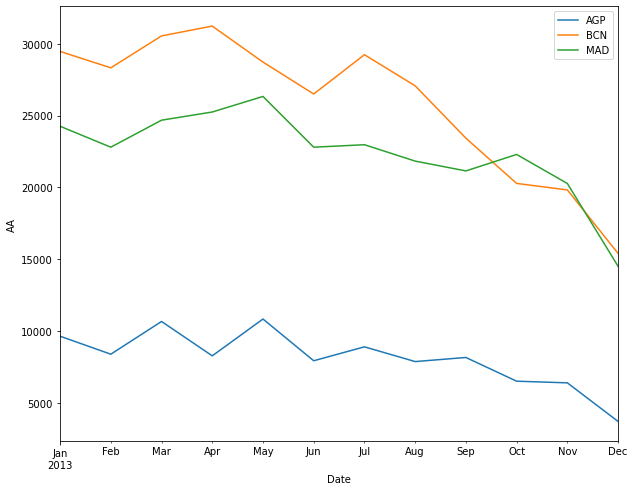

In [352]:
fig, ax = plt.subplots(figsize=(10, 8))
for arrival in searches_cities_gb['Destination'].unique():
    searches_cities_gb[searches_cities_gb['Destination'] == arrival].plot(ax=ax);
    ax.legend(searches_cities_gb['Destination'].unique())

In [360]:
fig.savefig('003.jpg')

### Exercise 4
Match searches with bookings  
• For every search in the searches file, find out whether
the search ended up in a booking or not (using the info
in the bookings file). For instance, search and booking
origin and destination should match.  
• For the bookings file, origin and destination are the
columns dep_port and arr_port, respectively.  
• Generate a CSV file with the search data, and an
additional field, containing 1 if the search ended up in
a booking, and 0 otherwise.

Se eliminan duplicados en ambas tablas.  
1.- Se genera un identificador único de cada search (usando el index del DF).  
2.- Se cruza con el DF de bookings por fecha, origen, destino.  
3.- En el caso de haber más de 1 vuelo por día, origen y destino se generan duplicados. Entonces se eliminan duplicados por el identificador del search (paso 1).  
4.- Si el identificador tiene valor entonces se asigna un 1 a la columna, si está vacío se asigna un 0

In [355]:
searches_sample = pd.read_csv(searches_big_bz2, sep='^', compression='bz2', nrows=20000)

In [356]:
searches_sample

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2013-01-20,12:17:26,MPT,3906b8b8cd8addf5042d07560bc7094d,IN,DEL,MAA,0,1,DEL,MAA,2013-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BOM
19996,2013-01-20,18:00:48,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,DRS,GOT,0,1,DRS,GOT,2013-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
19997,2013-01-20,20:55:05,MPT,3561a60621de06ab1badc8ca55699ef3,US,SLC,TUL,1,2,SLC,TUL,2013-12-08,NaN,NaN,TUL,SLC,2013-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
19998,2013-01-20,15:07:01,MPT,313fef8a27f062036781318cd9015a97,FI,HEL,GVA,1,2,HEL,GVA,2013-08-08,NaN,NaN,GVA,HEL,2013-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL


In [357]:
bookings_sample = pd.read_csv(booking_big_bz2, sep='^', compression='bz2', nrows=20000)

In [358]:
bookings_sample

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2013-03-25 00:00:00,1V,US,d5d00792d43261eafae3b65fdf3d429f,d9799f8fe4abf60b78055a31a3f2cecc,e640c32d4b8e7c340ba272c21e4970af,2013-03-25 00:00:00,283,2335,SJC,SJC,US,SAT,SAT,US,SAT,SAT,US,SJC,SJC,US,SAT,SAT,US,SATSJC,SATSJC,USUS,0,SJCPHXSAT,HX,Q,Y,2013-04-11 16:10:00,2013-04-11 22:53:31,1,2013,3,NULL
19996,2013-03-07 00:00:00,1V,US,223b58708f6d505556fdc45a74b3df8f,c3974732e27c09e16d54fb9cd9c94b3a,c7da7b2e3c88ba56e05cbeb054d0f57f,2013-03-07 00:00:00,4566,0,GSP,GSP,US,IAD,WAS,US,GSP,GSP,US,GSP,GSP,US,IAD,WAS,US,GSPIAD,GSPWAS,USUS,0,GSPIAD,FK,S,Y,2013-03-26 14:30:00,2013-03-26 16:01:35,1,2013,3,NULL
19997,2013-03-07 00:00:00,1V,US,223b58708f6d505556fdc45a74b3df8f,c3974732e27c09e16d54fb9cd9c94b3a,c7da7b2e3c88ba56e05cbeb054d0f57f,2013-03-07 00:00:00,4566,0,GSP,GSP,US,IAD,WAS,US,GSP,GSP,US,IAD,WAS,US,GSP,GSP,US,GSPIAD,GSPWAS,USUS,0,IADGSP,FK,S,Y,2013-03-29 17:05:00,2013-03-29 18:36:35,1,2013,3,NULL
19998,2013-03-18 00:00:00,1V,US,6c3cbba8d96d2d6a4f104a78e73edffd,09f9e4138079760b099d2e2e650c4c35,e509e16ded66eaed922ae188601c665b,2013-03-18 00:00:00,4308,0,ORD,CHI,US,SNA,SNA,US,ORD,CHI,US,ORD,CHI,US,SNA,SNA,US,ORDSNA,CHISNA,USUS,0,ORDSNA,FK,L,Y,2013-04-01 18:00:00,2013-04-01 20:03:32,1,2013,3,NULL


In [370]:
iter_searches = pd.read_csv(searches_big_bz2, sep='^', compression='bz2', iterator=True, chunksize=10000)
searches = pd.DataFrame()
for chunk in iter_searches:
    searches = pd.concat([searches, chunk.drop_duplicates(inplace=True)])

KeyboardInterrupt: 

In [ ]:
searches